# Experiments with Mergesort and Quicksort

## Mergesort

In [1]:
import sorts

In [2]:
sorts.merge([3,4,6,8],[1,2,5,7],verbose=True)

Took 1 from L1
Took 2 from L1
Took 3 from L0
Took 4 from L0
Took 5 from L1
Took 6 from L0
Took 7 from L1
Copying over unused element 8 from L0


[1, 2, 3, 4, 5, 6, 7, 8]

In [2]:
sorts.mergesort([8,6,4,3,5,7,1,2],verbose=True)

mergesort called on [8, 6, 4, 3, 5, 7, 1, 2]
mergesort called on [8, 6, 4, 3]
mergesort called on [8, 6]
mergesort called on [8]
returning [8] as it is already sorted
mergesort called on [6]
returning [6] as it is already sorted
Recursive calls yielded sorted sublists [8] and [6]
Merged to obtain [6, 8]
mergesort called on [4, 3]
mergesort called on [4]
returning [4] as it is already sorted
mergesort called on [3]
returning [3] as it is already sorted
Recursive calls yielded sorted sublists [4] and [3]
Merged to obtain [3, 4]
Recursive calls yielded sorted sublists [6, 8] and [3, 4]
Merged to obtain [3, 4, 6, 8]
mergesort called on [5, 7, 1, 2]
mergesort called on [5, 7]
mergesort called on [5]
returning [5] as it is already sorted
mergesort called on [7]
returning [7] as it is already sorted
Recursive calls yielded sorted sublists [5] and [7]
Merged to obtain [5, 7]
mergesort called on [1, 2]
mergesort called on [1]
returning [1] as it is already sorted
mergesort called on [2]
returni

[1, 2, 3, 4, 5, 6, 7, 8]

## Quicksort

In [6]:
import sorts

In [2]:
L = [7,6,2,3,5,8,1,4]

In [3]:
sorts.partition(L,start=0,end=len(L),verbose=True)

Partitioned into: [2, 3, 1] 4 [5, 8, 7, 6]


3

In [4]:
L = [7,6,2,3,5,8,1,4]

In [5]:
sorts.quicksort(L)

Partitioned into: [2, 3, 1] 4 [5, 8, 7, 6]
Partitioned into: [] 1 [3, 2]
Partitioned into: [] 2 [3]
Partitioned into: [5] 6 [7, 8]
Partitioned into: [7] 8 []


In [6]:
L

[1, 2, 3, 4, 5, 6, 7, 8]

## Proper test

Let's sort 10,000 random orderings of the integers 0..99.  Then test that in each case, the result is `[0,1,...,99]`.

In [4]:
import sorts
import random

In [5]:
for _ in range(10000):
    orig = list(range(100))
    copy = list(orig)
    random.shuffle(copy)
    sorts.quicksort(copy)
    assert orig==copy

print("The fact that no AssertionError stopped execution means that quicksort behaved as intended.")

The fact that no AssertionError stopped execution means that quicksort behaved as intended.


## Timing test

The graphical part of this section uses `matplotlib`, which can be installed with
```
python3 -m pip install matplotlib
```
(or replace `python3` with your interpreter name).

### Gathering data (small scale)

Let's test `mergesort` and `quicksort` on lists of different sizes.  For simplicity we'll use lists with no repeated elements, but it would also be a good idea to test when there are repeats.

In [14]:
import random
import sorts
import time

In [ ]:
# Dictionaries will map a size to a list of times taken to sort
# `trials` sample lists of that size.  That is,  if `trials` is 100
# quicksort_timings[80] would be a list of 100 measurements of the
# time taken to sort a list of length 80.
quicksort_timings = {}
mergesort_timings = {}

trials = 100
for n in range(0,7_001,500):
    if not n:
        continue
    quicksort_timings[n]=[]
    mergesort_timings[n]=[]
    # Create shuffled lists to be sorted
    inputs = []
    for _ in range(trials):
        L = list(range(n))
        random.shuffle(L)
        inputs.append(L)
    # Do the sorting, record time
    for L in inputs:
        # We need to do mergesort first, since quicksort modifies
        # its argument!
        t0 = time.time()
        sorts.mergesort(L)
        t1 = time.time()
        mergesort_timings[n].append(t1-t0)
        # Now test quicksort, letting it modify the list
        t0 = time.time()
        sorts.quicksort(L)
        t1 = time.time()
        quicksort_timings[n].append(t1-t0)
    print("Finished {} trials at size n={}".format(trials,n))

In [ ]:
mergesort_timings[1000][:10]

In [ ]:
quicksort_timings[1000][:10]

In [43]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
plt.figure(figsize=(8,6),dpi=120)
nn = sorted(quicksort_timings.keys())
nnsparse = [k for k in nn if k%1000==0]
plt.errorbar(nnsparse,[np.mean(quicksort_timings[n]) for n in nnsparse],yerr=[np.std(quicksort_timings[n]) for n in nnsparse],color="powderblue",ls="none")
plt.errorbar(nnsparse,[np.mean(mergesort_timings[n]) for n in nnsparse],yerr=[np.std(quicksort_timings[n]) for n in nnsparse],color="sandybrown",ls="none")
plt.plot(nn,[np.mean(quicksort_timings[n]) for n in nn],label="Quicksort")
plt.plot(nn,[np.mean(mergesort_timings[n]) for n in nn],label="Mergesort")
plt.title("Recursive sort timing")
plt.xlabel("n")
plt.ylabel("sort time (s)")
plt.legend()
plt.show()

### Gathering data (full scale)

In [90]:
import random
import sorts
import time

In [96]:
quicksort_timings = {}
mergesort_timings = {}
timsort_timings = {}

trials = 100
for n in range(0,20_001,500):
    if not n:
        continue
    quicksort_timings[n]=[]
    mergesort_timings[n]=[]
    timsort_timings[n]=[]
    # Create shuffled lists to be sorted
    inputs = []
    for _ in range(trials):
        L = list(range(n))
        random.shuffle(L)
        inputs.append(L)
    # Do the sorting, record time
    for L in inputs:
        # We need to do mergesort first, since quicksort modifies
        # its argument!
        t0 = time.time()
        sorts.mergesort(L)
        t1 = time.time()
        mergesort_timings[n].append(t1-t0)
        L2 = L[:]
        t0 = time.time()
        sorts.quicksort(L2)
        t1 = time.time()
        quicksort_timings[n].append(t1-t0)
        L2 = L[:]
        t0 = time.time()
        L2.sort()
        t1 = time.time()
        timsort_timings[n].append(t1-t0)
    print("Finished {} trials at size n={}".format(trials,n))

Finished 100 trials at size n=500
Finished 100 trials at size n=1000
Finished 100 trials at size n=1500
Finished 100 trials at size n=2000
Finished 100 trials at size n=2500
Finished 100 trials at size n=3000
Finished 100 trials at size n=3500
Finished 100 trials at size n=4000
Finished 100 trials at size n=4500
Finished 100 trials at size n=5000
Finished 100 trials at size n=5500
Finished 100 trials at size n=6000
Finished 100 trials at size n=6500
Finished 100 trials at size n=7000
Finished 100 trials at size n=7500
Finished 100 trials at size n=8000
Finished 100 trials at size n=8500
Finished 100 trials at size n=9000
Finished 100 trials at size n=9500
Finished 100 trials at size n=10000
Finished 100 trials at size n=10500
Finished 100 trials at size n=11000
Finished 100 trials at size n=11500
Finished 100 trials at size n=12000
Finished 100 trials at size n=12500
Finished 100 trials at size n=13000
Finished 100 trials at size n=13500
Finished 100 trials at size n=14000
Finished 100

In [97]:
mergesort_timings[1000][:10]

[0.0010478496551513672,
 0.0010330677032470703,
 0.0010371208190917969,
 0.0010306835174560547,
 0.0010387897491455078,
 0.0010371208190917969,
 0.0010383129119873047,
 0.0010623931884765625,
 0.0010538101196289062,
 0.001039266586303711]

In [98]:
quicksort_timings[1000][:10]

[0.0006625652313232422,
 0.00061798095703125,
 0.0006487369537353516,
 0.00057220458984375,
 0.0006372928619384766,
 0.0005958080291748047,
 0.0006604194641113281,
 0.0006108283996582031,
 0.000598907470703125,
 0.0006234645843505859]

In [99]:
timsort_timings[1000][:10]

[5.745887756347656e-05,
 5.507469177246094e-05,
 5.4836273193359375e-05,
 5.412101745605469e-05,
 5.3882598876953125e-05,
 5.435943603515625e-05,
 5.412101745605469e-05,
 5.459785461425781e-05,
 5.507469177246094e-05,
 5.459785461425781e-05]

In [94]:
import matplotlib.pyplot as plt
import numpy as np

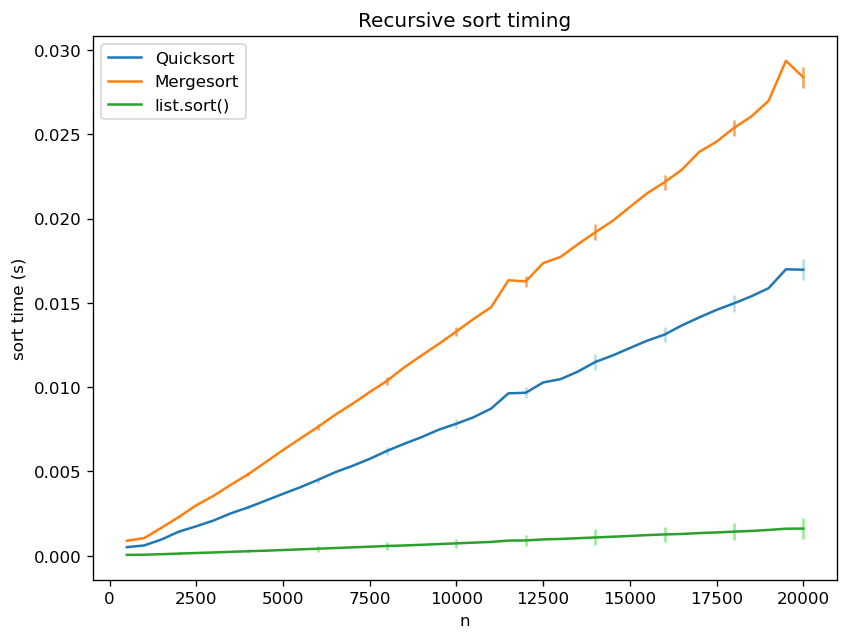

In [101]:
plt.figure(figsize=(8,6),dpi=120)
nn = sorted(quicksort_timings.keys())
nnsparse = [k for k in nn if k%2000==0]
plt.errorbar(nnsparse,[np.mean(quicksort_timings[n]) for n in nnsparse],yerr=[np.std(quicksort_timings[n]) for n in nnsparse],color="powderblue",ls="none")
plt.errorbar(nnsparse,[np.mean(mergesort_timings[n]) for n in nnsparse],yerr=[np.std(quicksort_timings[n]) for n in nnsparse],color="sandybrown",ls="none")
plt.errorbar(nnsparse,[np.mean(timsort_timings[n]) for n in nnsparse],yerr=[np.std(quicksort_timings[n]) for n in nnsparse],color="lightgreen",ls="none")
plt.plot(nn,[np.mean(quicksort_timings[n]) for n in nn],label="Quicksort")
plt.plot(nn,[np.mean(mergesort_timings[n]) for n in nn],label="Mergesort")
plt.plot(nn,[np.mean(timsort_timings[n]) for n in nn],label="list.sort()")
plt.title("Recursive sort timing")
plt.xlabel("n")
plt.ylabel("sort time (s)")
plt.legend()
plt.show()

Qualitative interpretation:
* It's hard to tell whether we are seeing linear growth or growth like $C n \log(n)$.
* Mergesort seems to take about 2x as long as quicksort for this range of $n$
* Python's built-in `sort()` method is dramatically faster.